In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import heapq
from tqdm import tqdm
import string
import math
from collections import Counter

## 数据处理
* 中文数据处理：jieba分词，去除停用词，以空格分割每个token。
* 英文数据处理：去除停用词。
* data的最终形式：`list(str)`，列表中每个string为一篇文档的内容，文档中每个token以空格分割。

In [2]:
# 定义数据文件路径
data_file = './train.txt'
stopwords_file = 'D:/CondaProject/ai-py/stopwords/stopwords_hgd.txt'

In [3]:
# 加载数据
with open(data_file, 'r', encoding='utf-8') as f:
    data = [line.strip() for line in f.readlines()]
print('data size: ', len(data))

with open(stopwords_file, 'r', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]
print('stop words size: ', len(stopwords))

data size:  2000
valid data size:  10
stop words size:  767


In [4]:
# 分词，初步清洗
# 去除中英文标点符号+数字+单字+停用词
punc = """！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏""" + string.punctuation
for i in tqdm(range(len(data))):
    data[i] = [word for word in jieba.lcut(data[i]) if len(word) > 1 and not word.isdigit() and word not in punc and word not in stopwords]
data[0]

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Dengmj7\AppData\Local\Temp\jieba.cache
Loading model cost 1.447 seconds.
Prefix dict has been built successfully.
100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 45.54it/s]


['职业规划',
 '成功',
 '留学',
 '铺路',
 '架桥',
 '职业规划',
 '成功',
 '留学',
 '保驾护航',
 '经济',
 '发展',
 '国民',
 '生活',
 '水平',
 '提高',
 '越来越',
 '家长',
 '留学',
 '教育',
 '投资',
 '以此',
 '孩子',
 '人生',
 '发展',
 '契机',
 '部分',
 '学生',
 '没有',
 '出国',
 '留学',
 '留学',
 '准备',
 '上钩',
 '最后',
 '海归',
 '成为',
 '海带',
 '海归',
 '在家',
 '待业',
 '海参',
 '海剩',
 '究竟',
 '决定',
 '留学',
 '需要',
 '做好',
 '哪些方面',
 '准备',
 '留学',
 '规划',
 '评估',
 '是否',
 '具备',
 '留学',
 '能力',
 '留学',
 '不是',
 '跑马观花',
 '出国',
 '旅游',
 '留学',
 '具备',
 '相关',
 '能力',
 '国外',
 '大学',
 '发现',
 '学习',
 '生活',
 '吃力',
 '留学',
 '成功',
 '关键',
 '能力',
 '包括',
 '语言',
 '能力',
 '学术',
 '能力',
 '心理',
 '承受能力',
 '留学',
 '攻破',
 '语言',
 '同学',
 '认为',
 '国外',
 '语言',
 '水平',
 '自然',
 '提上去',
 '事实上',
 '英语水平',
 '提升',
 '平时',
 '练习',
 '积累',
 '语言',
 '水平',
 '国外',
 '根本无法',
 '别人',
 '沟通',
 '生活',
 '英语',
 '学术',
 '英语',
 '不同',
 '生活',
 '英语',
 '上能',
 '达到',
 '交流',
 '应该',
 '掌握',
 '一定',
 '水平',
 '英语',
 '应用',
 '学术',
 '能力',
 '具备',
 '国外',
 '学习',
 '一定',
 '技能',
 '课堂',
 '演讲',
 '数据分析',
 '论文',
 '写作',
 '第三',
 '心理',
 '做好',
 '独立',
 '生活',
 '不同',
 '文化背景',
 '环境

In [5]:
# 统计idf较低的单词
def get_idf(data):
    # idf
    num_docs = len(data)
    appear = Counter([word for doc in data for word in set(doc)])
    idf = {k:math.log(num_docs / v) for k, v in appear.items()}
    idf = sorted(idf.items(),key=lambda x:x[1],reverse=False) 
    return idf

idf = get_idf(data)
idf

[('没有', 0.6665052496135241),
 ('已经', 0.8358634827615405),
 ('进行', 0.9001713499942717),
 ('记者', 0.9100601821235189),
 ('时间', 0.9200477807518674),
 ('表示', 0.9662691016803965),
 ('可能', 0.9983145673527458),
 ('目前', 1.0598724603521792),
 ('情况', 1.1679623668029029),
 ('现在', 1.1679623668029029),
 ('认为', 1.1907275775759152),
 ('北京', 1.2006450142332614),
 ('发现', 1.2173958246580767),
 ('中国', 1.2173958246580767),
 ('问题', 1.267622831402392),
 ('非常', 1.2783372196147984),
 ('需要', 1.3019532126861397),
 ('很多', 1.311186888633085),
 ('报道', 1.3261404383001434),
 ('这种', 1.3451524177887155),
 ('了解', 1.3509272172825992),
 ('相关', 1.3547956940605195),
 ('成为', 1.3567355588783463),
 ('出现', 1.3882963637905636),
 ('之后', 1.40649706843741),
 ('不是', 1.4126383364594925),
 ('今年', 1.4354846053106625),
 ('美国', 1.4354846053106625),
 ('新浪', 1.4396951378470058),
 ('工作', 1.4610179073158271),
 ('消息', 1.480605040591132),
 ('希望', 1.516403046466911),
 ('提供', 1.5209692644464923),
 ('要求', 1.5582696258597009),
 ('最后', 1.5726239393

In [6]:
# 将idf较低的词作为扩展的停用词，进一步清洗
stopwords2 = [x[0] for x in idf][:50]
data = [' '.join([word for word in doc if word not in stopwords2]) for doc in data]
data[0]

'职业规划 成功 留学 铺路 架桥 职业规划 成功 留学 保驾护航 经济 发展 国民 生活 水平 提高 越来越 家长 留学 教育 投资 以此 孩子 人生 发展 契机 部分 学生 出国 留学 留学 准备 上钩 海归 海带 海归 在家 待业 海参 海剩 究竟 决定 留学 做好 哪些方面 准备 留学 规划 评估 是否 具备 留学 能力 留学 跑马观花 出国 旅游 留学 具备 能力 国外 大学 学习 生活 吃力 留学 成功 关键 能力 语言 能力 学术 能力 心理 承受能力 留学 攻破 语言 同学 国外 语言 水平 自然 提上去 事实上 英语水平 提升 平时 练习 积累 语言 水平 国外 根本无法 别人 沟通 生活 英语 学术 英语 不同 生活 英语 上能 达到 交流 应该 掌握 水平 英语 应用 学术 能力 具备 国外 学习 技能 课堂 演讲 数据分析 论文 写作 第三 心理 做好 独立 生活 不同 文化背景 环境 准备 培养 坚强 性格 留学 规划 明确 留学 目的 出国 留学 目的 每个 相同 留学生 不外乎 第一 留学 归国 就业 留学 继续 深造 第三 留学 当地 就业 直至 移民 个别 学生会 回答 家里人 身边 同学 留学 试试 这部分 学生 想过 出国 顺利 拿到 毕业证 学位证 想过 留学 镀金 今后 生活 决定性 作用 院长 留学 投资 出国前 留学 目的 树立 留学 目标 投资 风险 降到 最低 明智 留学 规划 清晰 职业规划 专家 提醒 广大 意向 留学 同学 留学 专业 未来 职业规划 做好 准备 综合 背景 经济 能力 学校 专业 设置 职业 兴趣 未来 职业 发展 方向 机会 申请 学校 毕业生 分配情况 因素 学校 切忌 好高骛远 考虑 学校 能力 结合 起来 设立 最高 最低 目标 专业 学生 家长 眼光 应该 长远 同学 到底 打算 毕业 归国 国外 国外 当地 行业 更好 发展前景 归国 缺乏 人才 专业 考虑'

## PLSA

In [7]:
class PLSA:
    """
    PLSA implementation.
    Notation convention:
    * K -> num_topics
    * D -> doc_size
    * V -> vocab_size
    """
    def __init__(self, num_topics, num_iterations):
        self.num_topics = num_topics  # number of topics
        self.num_iterations = num_iterations  # number of iteration, typically 40-60 by the paper
        self.vocab = None  # vocabulary
        self.vocab_size = None  # vocabulary size, usually 30,000-40,000 for Chinease corpus
        self.doc_size = None  # document size
        self.word_count = None  # n(d,w), word count for each document
        self.p_z_d = None  # p(z|d), topic distribution on document
        self.p_w_z = None  # p(w|z), word distribution on topic
        # self.p_z_dw = None  # p(z|d, w)

    def fit(self, documents):
        # Vectorize corpus
        vectorizer = CountVectorizer()
        count_matrix = vectorizer.fit_transform(documents)
        self.vocab = vectorizer.get_feature_names_out()
        self.vocab_size = len(self.vocab)
        self.doc_size = count_matrix.shape[0]
        self.word_count = count_matrix.toarray()  # (D, V)

        # Initialize parameters
        # expectation
        # self.p_z_dw = np.zeros((self.doc_size, self.vocab_size, self.num_topics))  # (D, V, K)
        # parameter
        self.p_z_d = np.random.random(size=(self.doc_size, self.num_topics))  # (D, K)
        self.p_z_d = self.p_z_d / np.sum(self.p_z_d, axis=1).reshape(self.doc_size, 1)  # normalize
        self.p_w_z = np.random.random(size=(self.num_topics, self.vocab_size))  # (K, V)
        self.p_w_z = self.p_w_z / np.sum(self.p_w_z, axis=1).reshape(self.num_topics, 1)  # normalize

        # EM
        for i in tqdm(range(self.num_iterations)):
            # 不开p(z|d,w)的数组，只在M-step需要时计算。一重for循环，计算效率低，但节省了空间。
            # 文档数较多时适用。
            # M-step
            # p(w|z)
            s = np.zeros_like(self.p_w_z)
            for d in range(self.doc_size):
                z_dw = self.p_w_z * self.p_z_d[d][:, None]  # (K, V) * (K, 1) -> (K, V)
                z_dw = z_dw / np.sum(z_dw, axis=0)[None, :]  # (K, V) / (K, 1) -> (K, V)
                s += z_dw * self.word_count[d][None, :]  # (K, V) * (1, V) -> (K, V)
            self.p_w_z = s / np.sum(s, axis=1)[:, None]  # (K,V) / (K,1) -> (K,V)

            # p(z|d)
            s = np.zeros_like(self.p_z_d)  # (D, K)
            for w in range(self.vocab_size):
                z_dw = self.p_z_d * self.p_w_z[:, w][None, :]  # (D, K) * (1, K) -> (D, K)
                z_dw = z_dw / np.sum(z_dw, axis=1)[:, None]  # (D, K) / (D, 1) -> (D, K)
                s += z_dw * self.word_count[:, w][:, None]  # (D, K) * (D, 1) -> (D, K)
            self.p_z_d = s / self.doc_size
            
#             # 无for循环，用np方法计算，计算效率高。
#             # 文档数较少，开得起p(z|d,w)矩阵时适用。
#             # E-step
#             self.p_z_dw = np.rollaxis(self.p_z_d.transpose()[..., None] * self.p_w_z[:, None], 0, 3)  # (K, D, V) -> (D, V, K)
#             self.p_z_dw = self.p_z_dw / np.sum(self.p_z_dw, axis=2)[..., None]
#             # M-step
#             z_dw = self.word_count.reshape(self.doc_size, self.vocab_size, 1) * self.p_z_dw  # (D, V, K)
#             self.p_w_z = np.sum(z_dw, axis=0).transpose()  # (K, V)
#             self.p_w_z = self.p_w_z / np.sum(self.p_w_z, axis=1).reshape(self.num_topics, 1)
#             self.p_z_d = np.sum(z_dw, axis=1) / self.doc_size  # (D, K)
            
#             # 两重for循环，效率低，不建议使用。
#             # E-step
#             for d in range(self.doc_size):
#                 for w in range(self.vocab_size):
#                     z_dw = self.p_w_z[:, w] * self.p_z_d[d]  # (K,)
#                     self.p_z_dw[d, w] = z_dw / np.sum(z_dw)  # normalize
#             # M-step
#             # Update p(w|z)
#             for z in range(self.num_topics):
#                 for w in range(self.vocab_size):
#                     self.p_w_z[z, w] = np.sum(self.word_count[:, w] * self.p_z_dw[:, w, z])  # (D,) -> 1
#                 self.p_w_z[z] = self.p_w_z[z] / np.sum(self.p_w_z[z])
#             # Update p(z|d)
#             for d in range(self.doc_size):
#                 for z in range(self.num_topics):
#                     self.p_z_d[d, z] = np.sum(self.word_count[d] * self.p_z_dw[d, :, z])  # (V,) -> 1
#                 self.p_z_d[d] = self.p_z_d[d] / np.sum(self.p_z_d[d])
        return

    def show_topic_words(self, k=10):
        """
        Show topk frequent words for each topic.
        """
        for i in range(self.num_topics):
            lst = list(self.p_w_z[i])
            topk_idx = heapq.nlargest(k, range(len(lst)), lst.__getitem__)
            words = [self.vocab[j] for j in topk_idx]
            print('Topic {}: {}'.format(i + 1, words))
            
    def topic_word_count(self, k=10):
        """
        Return topk frequent words with probability for each topic.
        """
        dic_lst = []
        for i in range(self.num_topics):
            lst = list(self.p_w_z[i])
            topk_idx = heapq.nlargest(k, range(len(lst)), lst.__getitem__)
            dic = {self.vocab[idx]: lst[idx] for idx in topk_idx}
            dic_lst.append(dic)
        return dic_lst

In [9]:
plsa = PLSA(num_topics=10, num_iterations=20)
plsa.fit(data)
plsa.show_topic_words(10)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [17:02<00:00, 51.11s/it]


Topic 1: ['比赛', '俱乐部', '球员', '球队', '中甲', '队员', '联赛', '冲超', '主场', '球迷']
Topic 2: ['银行', '信用卡', '客户', '贷款', '还款', '消费', '业务', '房贷', '风险', '持卡人']
Topic 3: ['医院', '民警', '警方', '男子', '一名', '现场', '昨日', '派出所', '女子', '下午']
Topic 4: ['研究', '科学家', '火星', '地球', '太空', '人类', '英国', '科技', '形成', '月球']
Topic 5: ['留学', '觉得', '生活', '孩子', '研究', '主持人', '留学生', '世界', '文化', '大家']
Topic 6: ['分钟', '比赛', '世界杯', '阿根廷', '球员', '巴西', '马拉多纳', '禁区', '球队', '进球']
Topic 7: ['市场', '价格', '银行', '银行卡', '投资', '红木家具', '收藏', '万元', '上涨', '人民币']
Topic 8: ['孩子', '对撞机', '邮票', '大型', '强子', '翡翠', '母亲', '收藏', '生活', '先生']
Topic 9: ['学生', '留学', '大学', '学校', '申请', '专业', '签证', '教育', '英国', '学习']
Topic 10: ['俱乐部', '足球', '球队', '大连', '中甲', '恒大', '广州', '球员', '联赛', '比赛']


## 可视化
* 画个词云图

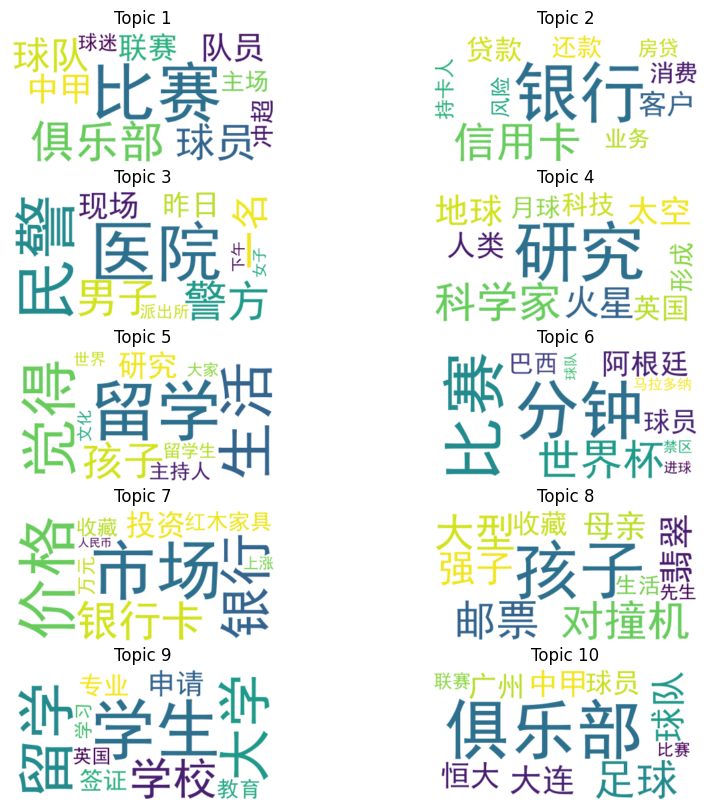

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_counts = plsa.topic_word_count()


plt.figure(figsize=(10, 10))
for i in range(10):  # 主题数，注意设置为num_topics
    plt.subplot(5, 2, i+1)

    # 绘制词云
    my_cloud = WordCloud(
        background_color='white',  # 背景颜色  默认是black
        font_path='simhei.ttf',   # 字体
        max_font_size=99,         # 字体最大值
        min_font_size=16,         # 字体最小值
        random_state=50           # 设置随机生成状态，即多少种配色方案
    ).generate_from_frequencies(word_counts[i])

    # 词云图加进plt
    plt.imshow(my_cloud, interpolation='bilinear')
    # 去掉坐标轴和坐标
    plt.axis('off')
    plt.title('Topic {}'.format(i+1))
plt.show()